对原始图像做简单的改变扩充数据
- 旋转、模糊、调整饱和度/亮度、放大缩小、变形
- 水平、垂直、镜面翻转

使用torchvision.transforms中包含的类实现常见增强手段
，可以分为四大类别：
- 尺寸变化
- 像素变化（颜色）
- 视角变化
- 其他变化

In [1]:
import torchvision
import torchvision.transforms as transforms

In [2]:
data_val = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_train"]
#                                    ,transform=transforms.ToTensor()
                                    )

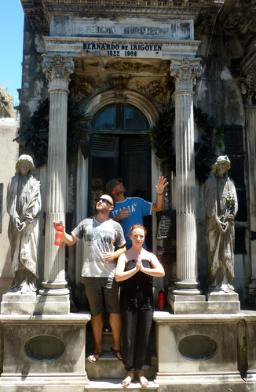

In [3]:
# 原图
data_val[0][0]

In [4]:
data_val = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_train"]
                                   ,transform=transforms.ToTensor()
                                    )

In [5]:
data_val[0][0].shape

torch.Size([3, 392, 256])

In [6]:
# 图片尺寸一致
# 使用随机裁剪抗过拟合 RandomCrop 224x224

In [7]:
transform_aug = transforms.Compose([transforms.Resize(256)
                                  ,transforms.RandomCrop(size=(224))
                                  ,transforms.RandomHorizontalFlip(p=1)])
# 随机横向翻转，概率p，选取概率p的颜本翻转

In [8]:
data_val_aug = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_train"]
                                   ,transform=transform_aug
                                    )

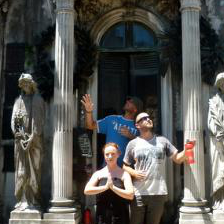

In [9]:
data_val_aug[0][0]

In [11]:
transform_aug = transforms.Compose([transforms.Resize(256)
                                  ,transforms.RandomCrop(size=(224))
                                  ,transforms.RandomHorizontalFlip(p=1)
                                  ,transforms.ToTensor()])
# 随机横向翻转，概率p，选取概率p的颜本翻转

In [12]:
data_val_aug = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                   ,classes=["church_outdoor_train"]
                                   ,transform=transform_aug
                                    )

In [13]:
data_val_aug[0][0].shape

torch.Size([3, 224, 224])

In [16]:
# 预处理\图像增强写在一起
transform = transforms.Compose([transforms.Resize(256) # 先对尺寸进行操作
                              ,transforms.RandomCrop(size=(224))
                              ,transforms.RandomHorizontalFlip(p=1)
                              ,transforms.RandomRotation(degrees=(-70,70)) # 再进行翻转、旋转等操作
                              ,transforms.ToTensor() # 对图片都处理后，转换为Tensor
                              ,transforms.Normalize(mean=[0.485,0.456,0.406] # 最后进行归一化
                                                   ,std=[0.229,0.224,0.225])
                              ])

In [17]:
# 导入数据
data_train = torchvision.datasets.LSUN(root=r"/Users/feishuoren/Projects/pytorch_learning/Datasets/lsun-master/data"
                                       ,classes=["church_outdoor_train"]
                                       ,transform=transform
                                        )
data_train[0][0].shape

torch.Size([3, 224, 224])

In [18]:
# 为了节省空间，只保存原始数据，仅在调用数据时才对数据进行transform处理，有利于计算速度

In [19]:
# 原本epoch是增加迭代次数，batchdata分批次，每个epoch使用的总数据相同
# transform后
# 增强操作在每一个epoch中完成
# batchdata 分批调用时会随机transform
# 每个epoch会使用不同的总数据,产生N组新的数据
"""
for epoch in range(epochs):
    for batch_idx,(x,y) in enumerate(batchdata):
        sigma
        loss
        opt
        
        yhat
        correct
"""

In [20]:
# 模型迭代周期会更长
# 数据增强中的随机性无法使用随机数种子进行控制
# 要阶段性保存模型